In [2]:
from DTC_cirq_V2 import *


In [3]:
# Define the error rates
depolarizing_error_rate = 0.00
phase_damping_error_rate = 0.00
amplitude_damping_error_rate = 0.00
my_noise_model = MyNoiseModel(depolarizing_error_rate, phase_damping_error_rate, amplitude_damping_error_rate)

In [4]:
sq = 4
N_QUBITS = sq**2 #Number of qubits used in Google paper
qreg_1D = cirq.LineQubit.range(N_QUBITS)
qreg_2D = cirq.GridQubit.square(sq)

(16, 51)


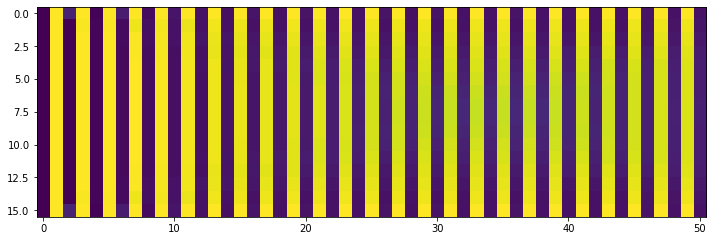

In [5]:
#1D time crystal with no noise and no disorder
floq_circuit = DTC_Circuit_list(
                    qreg_1D, 
                    cycles = 50 ,#num_cycles
                    g_value = 0.9 ,#G
                    theta = 1*np.pi,
                    phi = 1*np.pi,
                    alpha = 1*np.pi,
                    beta = 1*np.pi,
                    local_fields = 1 #D
                    )

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})

(16, 51)


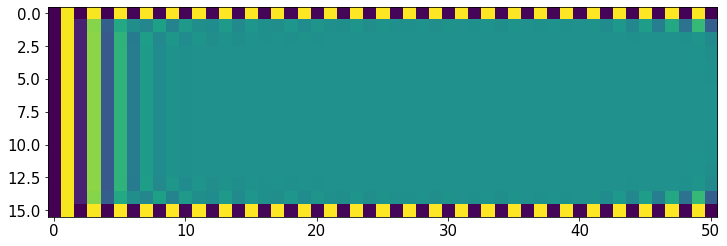

In [6]:
#1D time crystal with no noise and disorder
floq_circuit = DTC_Circuit_list(
                    qreg_1D, 
                    cycles = 50 ,#num_cycles
                    g_value = 0.9 ,#G
                    theta = 1*np.pi,
                    phi = 1*np.pi,
                    alpha = 1*np.pi,
                    beta = 1*np.pi,
                    local_fields = 0 #D
                    )

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})

(16, 51)


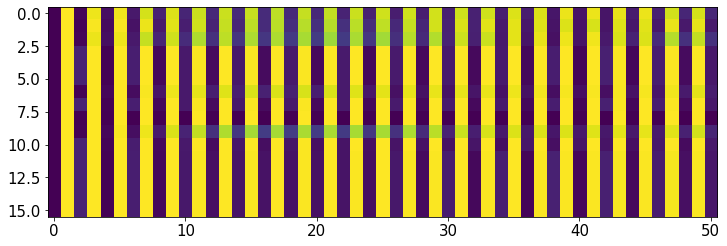

In [7]:
#2D time crystal with no noise and no disorder
floq_circuit = DTC_Circuit_list_2D(
                    sq,
                    qreg_2D, 
                    cycles = 50 , #num_cycles
                    g_value = 0.9, #G
                    theta = 1*np.pi,
                    phi = 1*np.pi,
                    alpha = 1*np.pi,
                    beta = 1*np.pi,
                    local_fields = 1 #D is scaled to PI and shifted by PI 
                    )
                    
result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)
dtc_z = np.transpose(get_polarizations(result, N_QUBITS))


print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})

(16, 51)


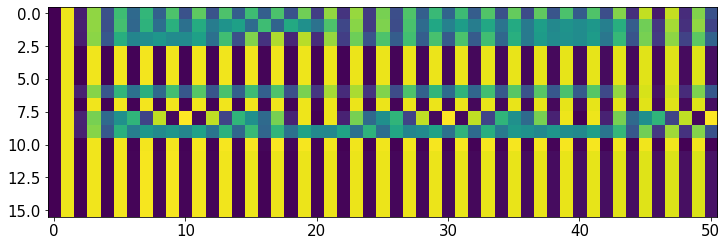

In [8]:
#2D time crystal with no noise and disorder
floq_circuit = DTC_Circuit_list_2D(
                    sq,
                    qreg_2D, 
                    cycles = 50 , #num_cycles
                    g_value = 0.9, #G
                    theta = 1*np.pi,
                    phi = 1*np.pi,
                    alpha = 1*np.pi,
                    beta = 1*np.pi,
                    local_fields = 0 #D is scaled to PI and shifted by PI 
                    )
                    
result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)
dtc_z = np.transpose(get_polarizations(result, N_QUBITS))


print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})

In [9]:
# Update noise model to 1% noise
depolarizing_error_rate = 0.01
phase_damping_error_rate = 0.01
amplitude_damping_error_rate = 0.01
my_noise_model = MyNoiseModel(depolarizing_error_rate, phase_damping_error_rate, amplitude_damping_error_rate)

(16, 51)


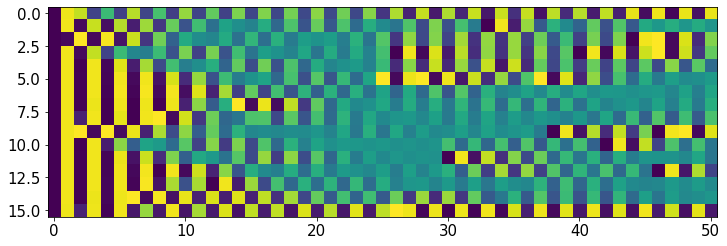

In [10]:
#1D time crystal with noise and no disorder
floq_circuit = DTC_Circuit_list(
                    qreg_1D, 
                    cycles = 50 ,#num_cycles
                    g_value = 0.9 ,#G
                    theta = 1*np.pi,
                    phi = 1*np.pi,
                    alpha = 1*np.pi,
                    beta = 1*np.pi,
                    local_fields = 1 #D
                    )

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})

(16, 51)


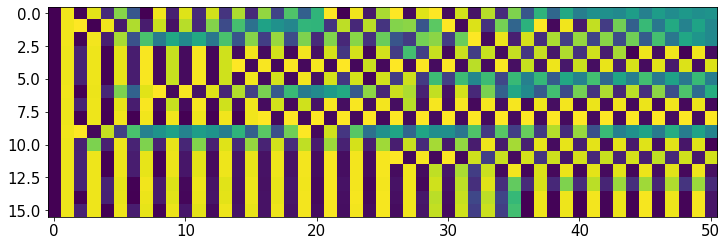

In [11]:
#2D time crystal with noise and no disorder
floq_circuit = DTC_Circuit_list_2D(
                    sq,
                    qreg_2D, 
                    cycles = 50 , #num_cycles
                    g_value = 0.9, #G
                    theta = 1*np.pi,
                    phi = 1*np.pi,
                    alpha = 1*np.pi,
                    beta = 1*np.pi,
                    local_fields = 1 #D is scaled to PI and shifted by PI 
                    )
                    
result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)
dtc_z = np.transpose(get_polarizations(result, N_QUBITS))


print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})

(51,)


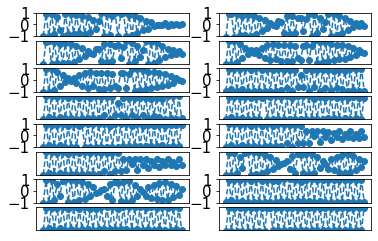

In [12]:
#Autocorrelation per Qubit
fig, ax = plt.subplots(int(N_QUBITS/2),2)
dtc_b = dtc_z - dtc_z.mean(axis=1, keepdims=True)
for ii in range(int(N_QUBITS/2)):
    for jj in range(2):
        ax[int(ii),int(jj)].plot(dtc_b[int(ii)+int(jj),:], linestyle = '--', marker = 'o')
        ax[int(ii),int(jj)].set_ylim([-1,1])
        ax[int(ii),int(jj)].set_ylim([-1,1])
        ax[int(ii),int(jj)].set_xticks([])
        if ii % 2 == 1:
            ax[int(ii),int(jj)].set_yticks([])
plt.rcParams.update({'font.size': 12})
#plt.rcParams['text.usetex'] = True
DTC_sum = np.sum(dtc_b,axis=0)/N_QUBITS
#np.save('DTC_SUM_G%0.2f_D%0.2f_1D'%(G,D),DTC_sum)
print(DTC_sum.shape)


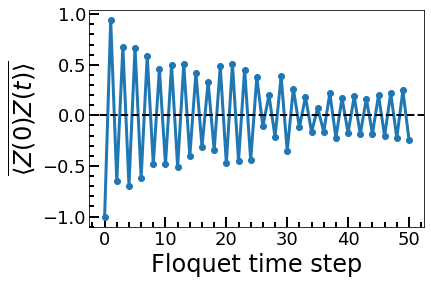

In [13]:
#averaged Autocorrelation
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot(DTC_sum,linewidth = 3,marker = 'o')
plt.axline((0,0),(num_cycles,0),color='k',linewidth = 2,linestyle='--')
ax.set_ylabel(r'$\overline{ \langle Z(0)Z(t) \rangle}$',fontsize=24)
ax.set_xlabel('Floquet time step',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_yticks([1.00,0.5,0.0,-0.5,-1.0],minor=True,fontsize=18)
ax.minorticks_on()
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which='major', length=10, width=2, direction='in',labelsize=18)
ax.tick_params(which='minor', length=5, width=2, direction='in',labelsize=18)

(-0.01, 0.51)

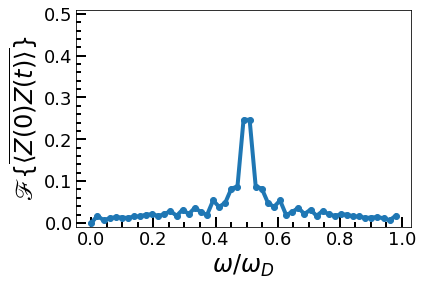

In [14]:
#FFT of autocorrelation
fig = plt.figure()
ax = plt.subplot(1,1,1)
f_s = 51
samplingFrequency   = 1
samplingInterval       = 1 / samplingFrequency
fourierTransform = np.fft.fft(DTC_sum)/len(DTC_sum)
fourierTransform = fourierTransform[range(int(len(DTC_sum)))]
tpCount     = len(DTC_sum)
values      = np.arange(int(tpCount))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod
plt.plot(frequencies, np.abs(fourierTransform),marker='o',linewidth=4)
ax.minorticks_on()
#ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(which='major', length=10, width=2, direction='in',labelsize=18)
ax.tick_params(which='minor', length=5, width=2, direction='in',labelsize=18)
ax.set_ylabel(r'$\mathscr{F} \{\overline{ \langle Z(0)Z(t) \rangle} \}$',fontsize=24)
ax.set_xlabel(r'$\omega /\omega_D$',fontsize=24)
plt.ylim([-0.01,0.51])